# Welcome to the HighTEA tutorial!

This notebook is an introdcution in some functionality of the HighTEA (High energy - Theory Event Analysis) database.

This is still in an early phase of development. Please report any bug or problem to hightea@hep.phy.cam.ac.uk or create an issue on https://github.com/HighteaCollaboration/hightea-examples/issues.

The next 2 line needs to be executed to install the highteacli hightea-plotting library. (If you run this notebook locally and you have already install them you can skip this step)

In [ ]:
%pip install hightea-client > /dev/null
%pip install hightea-plotting > /dev/null

The next line will load the user interface which makes interaction with database really easy!

In [1]:
# execute this line to load the hightea library
from hightea.client import Interface as hightea
from hightea.plotting import plot

If you would like to store results and job information on your GoogleDrive (see FAQ in Start.ipynb) change the directory here:

In [2]:
USERDIR='.'
#from google.colab import drive
#drive.mount('/content/drive')
#USERDIR='/content/drive/MyDrive/hightea/'

# 1. *A first simple histogram*

The first thing to do is to create a job. A job contains all the information needed to create request to the database. After `job.start()` the first thing we need to do is to specify the process we want to generate histograms for. A list of available processes can be generated by `job.list_processes()`

In [3]:
job1 = hightea('Tutorial-job1',directory=USERDIR)
job1.process('pp_ttx_13TeV')

   pp -> t tbar +X at 13 TeV with mt = 172.5 GeV 

Process tag          :  pp_ttx_13TeV  (use for process specification)
Default scales      :  muR0 = HT/4, muF0 = HT/4
Default pdf         :  NNPDF31_nnlo_as_0118 / 0
Avail. contributions:  ['NNLO', 'NLO', 'LO']
Predefined variables
   pt_top      :  sqrt(p_t_1**2 + p_t_2**2)
   pt_tbar     :  sqrt(p_tbar_1**2 + p_tbar_2**2)
   y_t         :  0.5*log((p_t_0 + p_t_3)/(p_t_0 - p_t_3))
   y_tbar      :  0.5*log((p_tbar_0 + p_tbar_3)/(p_tbar_0 - p_tbar_3))


A basic histogram specification needs

1. `job.contribution(string)`: include a contribution. Each process provides a list of contributions througt the metadata, see above.

2. `job.binning(string,list)`: specify the actual histogram through a variable `string` and a list of bin edges (`[...]`). We used in the example a predefiend variable `pt_top`. All predefiend variables are listed above. Customized observables are discussed in a later example.

In [4]:
job1.add_histogram() # create a new histogram
job1.contribution('LO') # define LO as contribution
job1.description('LO mt = 172.5 GeV') # this step is optional, define a name for the histogram.
job1.binning('pt_top',[0, 50, 100, 150, 200, 250, 300, 350, 400]) # define a binning

Having defined a request, it is time to send off to the database and wait for the result. This is done by the `job.request()` function which send off a request and will patiently wait until the request has been processed. In case of success it will retrieve automatically the results and store it.

In [5]:
job1.request()

request submitted :  2021-11-30 11:03:38.911172
request finished  :  2021-11-30 11:03:41.065143


The `request()` command will print out when a request has been submitted and when it has been finished.

So, we can investigate the result via `job.show_result()` . There is also the function `job.result()` which provides a more machine readable format.

We also demonstrate the basic usage of the provided plotting routines.

Histogram  0
Name                    :  LO mt = 172.5 GeV
Contributions           :  ['LO']
fiducial xsection       :       576.34
fiducial xsection error :      0.85557
Histogram     : pt_top
 bin1 low  | bin1 high | sigma [pb]  | mc-err [pb] |
         0 |        50 |       88.01 |     0.25382 |
        50 |       100 |      182.25 |      0.3903 |
       100 |       150 |      148.17 |     0.34393 |
       150 |       200 |      82.697 |     0.24506 |
       200 |       250 |      39.339 |     0.16337 |
       250 |       300 |      18.359 |     0.10969 |
       300 |       350 |      8.5776 |    0.074356 |
       350 |       400 |      4.1933 |    0.051793 |




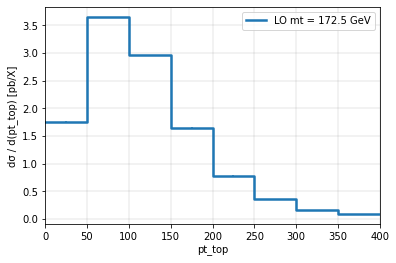

<Figure size 432x288 with 0 Axes>

In [6]:
job1.show_result() # create a human-readable histogram
plot(job1.result()) # make a plot

Very good! You just computed your first differential cross section with HighTEA!

When you are finished with a request and you don't need the results anymore clean up the client via `job.clear()`. Or you can keep the data.

# 2. *A first NNLO analysis*

Lets do a little bit more complicated example. An usual application would be to study a observable at different orders in perturbation theory. We easily do this by adding more request using different contributions. Consider the following example which add additional histograms to submit a combined request.

In [7]:
job2 = hightea('Tutorial-job2',directory=USERDIR)
job2.process('pp_ttx_13TeV',verbose=False) # verbose=False to avoid printing process information

job2.add_histogram()
job2.description('LO')
job2.contribution('LO')
job2.binning('pt_top',[0, 50, 100, 150, 200, 250, 300, 350, 400])

job2.add_histogram()
job2.description('NLO')
job2.contribution('NLO')
job2.binning('pt_top',[0, 50, 100, 150, 200, 250, 300, 350, 400])

job2.add_histogram()
job2.description('NNLO')
job2.contribution('NNLO')
job2.binning('pt_top',[0, 50, 100, 150, 200, 250, 300, 350, 400])

`job2.request()` will now submit all histograms at once and wait for the completion.

Execution time: ~90 seconds.

In [8]:
job2.request()

request submitted :  2021-11-30 11:04:09.799541
request finished  :  2021-11-30 11:06:29.117658


Again you investigate the results via `job2.show_results()`. But it is much nicer to produce a plot to compare the different orders! The simplest way is to use the provided plotting routines.

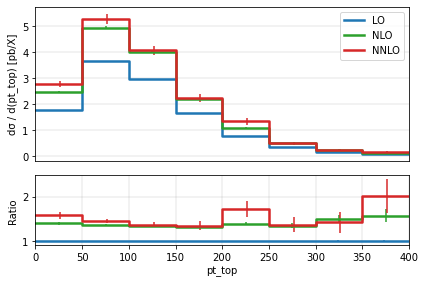

<Figure size 432x288 with 0 Axes>

In [9]:
plot(job2.result(),ratio=0)

**Congratulations!** You just performed a full fledge NNLO QCD computation for top-quark pair production! Easy, wasn't it?
You should have produced a figure which looks like:

![alt text](./figs/tutorial-fig1.png "Example")

(without the explanations of course ;-) )

# 3. *Scale and PDF variations using reweighting*

Let's move on to a more elaborate example.

**Scale variations:**
 See the request below, we introduce the function `job.scales('muR','muF')`. `'muR'` and `'muF'` control the renormalization and factorization scale respectively. The example is somewhat redundent as we choose the default scale `'muR0'` which is in this case HT/4, a typical scale for top-quark pair production. To check what the default scale of a process is refer to the meta data.
 
 **PDF variation:** We also introduce the `job.pdf('pdf')` function keyword which allows to choose a PDF. To list the currently available PDF sets refer to `job.list_pdfs()`.

 **Custom observables:** And finally we introduce the function `job.define_new_variable('name','definition')` which allows to define custom variables. Here we define the invariant mass of the top-quark pair as a new observable. A new observable needs to be specified only once per job.
 
Changing the central scales and PDFs is nice but usually one is interested in some theory uncertainty determined from scale variations. There are two predefined scale variations available:

1. `'3-point'` : Variation of scale by a factor of 2 and 1/2. muR and muF are varied simulanously
2. `'7-point'` : Variation of scales by a factor 2 and 1/2, independently for muR and muF with the constraint 1/2 < muR/muF < 2

They can be easly requested by the `job.scale_variation` function.

Again let us compute this histogram at the different orders in perturbation theory. Additionally to requesting different orders we also request a standard '3-point' variation.

The runtime of this is about 8 minutes. The reweighting takes a little bit longer as requests without  specifing `'muR'`,`'muF'` or `'pdf'` since calls to LHAPDF are necessary.

In [10]:
# mandatory
job3 = hightea('Tutorial-job3',directory=USERDIR)
job3.process('pp_ttx_13TeV')
job3.define_new_variable('mtt','sqrt((p_t_0+p_tbar_0)**2-(p_t_1+p_tbar_1)**2-(p_t_2+p_tbar_2)**2-(p_t_3+p_tbar_3)**2)')

   pp -> t tbar +X at 13 TeV with mt = 172.5 GeV 

Process tag          :  pp_ttx_13TeV  (use for process specification)
Default scales      :  muR0 = HT/4, muF0 = HT/4
Default pdf         :  NNPDF31_nnlo_as_0118 / 0
Avail. contributions:  ['NNLO', 'NLO', 'LO']
Predefined variables
   pt_top      :  sqrt(p_t_1**2 + p_t_2**2)
   pt_tbar     :  sqrt(p_tbar_1**2 + p_tbar_2**2)
   y_t         :  0.5*log((p_t_0 + p_t_3)/(p_t_0 - p_t_3))
   y_tbar      :  0.5*log((p_tbar_0 + p_tbar_3)/(p_tbar_0 - p_tbar_3))


In [11]:
labels = ['LO','NLO','NNLO']
for it in range(0,len(labels)):
    job3.add_histogram()
    job3.description(labels[it])
    job3.contribution(labels[it])
    job3.scales('muR0','muF0')
    job3.pdf('CT14nnlo')
    job3.binning('mtt',[345, 400, 450, 500, 550, 600, 650, 700])
    job3.scale_variation('3-point')

In [12]:
job3.request()

request submitted :  2021-11-30 11:06:31.387130
request finished  :  2021-11-30 11:28:55.119541


Histogram  0
Name                    :  LO
Contributions           :  ['LO']
muR                     :  muR0
muF                     :  muF0
pdf                     :  CT14nnlo
variation               :  ['3-point']
fiducial xsection       :       582.54
fiducial xsection error :      0.86518
scale-unc.(3-point) [%] : +        31/ -        22
Histogram     : mtt
 bin1 low  | bin1 high | sigma [pb]  | mc-err [pb] | scale-unc.(3-point) [%] |
       345 |       400 |      117.82 |     0.30011 | +        27/ -        20|
       400 |       450 |      121.45 |      0.3061 | +        29/ -        21|
       450 |       500 |      94.285 |     0.26491 | +        30/ -        22|
       500 |       550 |      68.462 |     0.22185 | +        31/ -        22|
       550 |       600 |      48.734 |     0.18468 | +        32/ -        23|
       600 |       650 |      34.545 |     0.15402 | +        33/ -        23|
       650 |       700 |      24.761 |     0.12962 | +        34/ -        24|


H

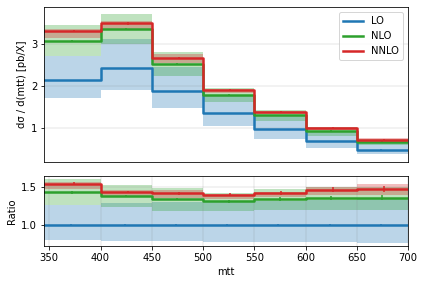

<Figure size 432x288 with 0 Axes>

In [14]:
job3.show_result()
plot(job3.result(),ratio=0)

# 4. *Introducing phase space cuts*

Using the `job.cuts()` function allows to define phase space cuts. In the example below we introduce a cut on the top-quark transverse momentum.

In [15]:
job4 = hightea('Tutorial-job4',directory=USERDIR)
job4.process('pp_ttx_13TeV')
job4.define_new_variable('mtt','sqrt((p_t_0+p_tbar_0)**2-(p_t_1+p_tbar_1)**2-(p_t_2+p_tbar_2)**2-(p_t_3+p_tbar_3)**2)')
job4.define_new_variable('pTtop','sqrt(p_t_1**2 + p_t_2**2)')

ptcuts = ['10','20','30','40']
for it in range(0,len(ptcuts)):
    job4.add_histogram()
    job4.description('NNLO pT top > '+ptcuts[it]+' GeV')
    job4.contribution('NNLO')
    job4.binning('mtt',[345, 400, 450, 500, 550, 600, 650, 700])
    job4.cuts('sqrt(p_t_1**2 + p_t_2**2) > '+ptcuts[it])

   pp -> t tbar +X at 13 TeV with mt = 172.5 GeV 

Process tag          :  pp_ttx_13TeV  (use for process specification)
Default scales      :  muR0 = HT/4, muF0 = HT/4
Default pdf         :  NNPDF31_nnlo_as_0118 / 0
Avail. contributions:  ['NNLO', 'NLO', 'LO']
Predefined variables
   pt_top      :  sqrt(p_t_1**2 + p_t_2**2)
   pt_tbar     :  sqrt(p_tbar_1**2 + p_tbar_2**2)
   y_t         :  0.5*log((p_t_0 + p_t_3)/(p_t_0 - p_t_3))
   y_tbar      :  0.5*log((p_tbar_0 + p_tbar_3)/(p_tbar_0 - p_tbar_3))


In [16]:
job4.request()

request submitted :  2021-11-30 11:31:13.125952
request finished  :  2021-11-30 11:45:10.454789


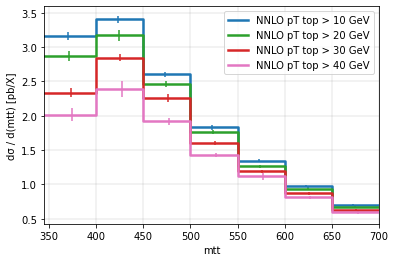

<Figure size 432x288 with 0 Axes>

In [17]:
plot(job4.result())

In [18]:
job4.show_result()

Histogram  0
Name                    :  NNLO pT top > 10 GeV
Contributions           :  ['NNLO']
fiducial xsection       :       818.35
fiducial xsection error :       5.8286
Histogram     : mtt
 bin1 low  | bin1 high | sigma [pb]  | mc-err [pb] |
       345 |       400 |      173.68 |      3.0844 |
       400 |       450 |      170.22 |      2.2851 |
       450 |       500 |      130.07 |      1.5665 |
       500 |       550 |      91.672 |      1.7617 |
       550 |       600 |      67.403 |      1.0402 |
       600 |       650 |      48.975 |     0.84012 |
       650 |       700 |      35.098 |     0.70266 |


Histogram  1
Name                    :  NNLO pT top > 20 GeV
Contributions           :  ['NNLO']
fiducial xsection       :       770.06
fiducial xsection error :       7.2034
Histogram     : mtt
 bin1 low  | bin1 high | sigma [pb]  | mc-err [pb] |
       345 |       400 |      157.76 |      3.8021 |
       400 |       450 |      158.56 |      4.1858 |
       450 |       500 | 